# HEALTH INSURANCE PREDICTION

### Import Necessary Libraries

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [124]:
insurance_dataset = pd.read_csv('health_insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [125]:
insurance_dataset.shape

(1338, 7)

In [126]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Visualisation

#### Age vs Charges

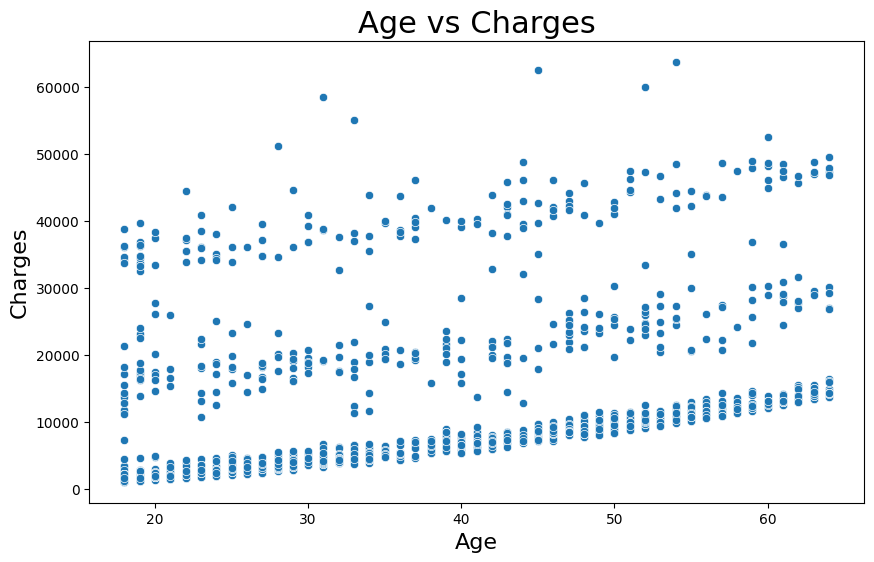

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance_dataset)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.title('Age vs Charges', fontsize=22)
plt.show()

#### Sex vs Charges

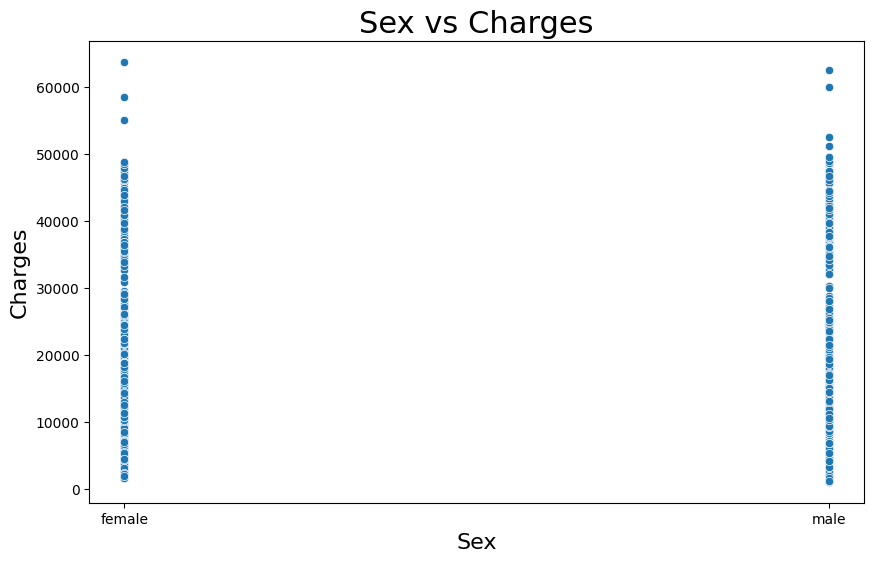

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sex', y='charges', data=insurance_dataset)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.title('Sex vs Charges', fontsize=22)
plt.show()

In [129]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

#### BMI vs Charges

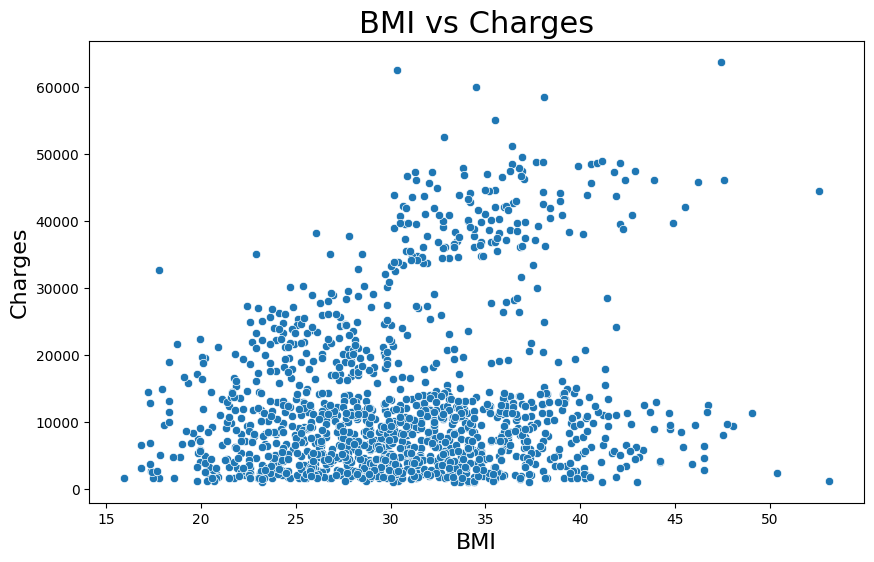

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_dataset)
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.title('BMI vs Charges', fontsize=22)
plt.show()

#### Children vs Charges

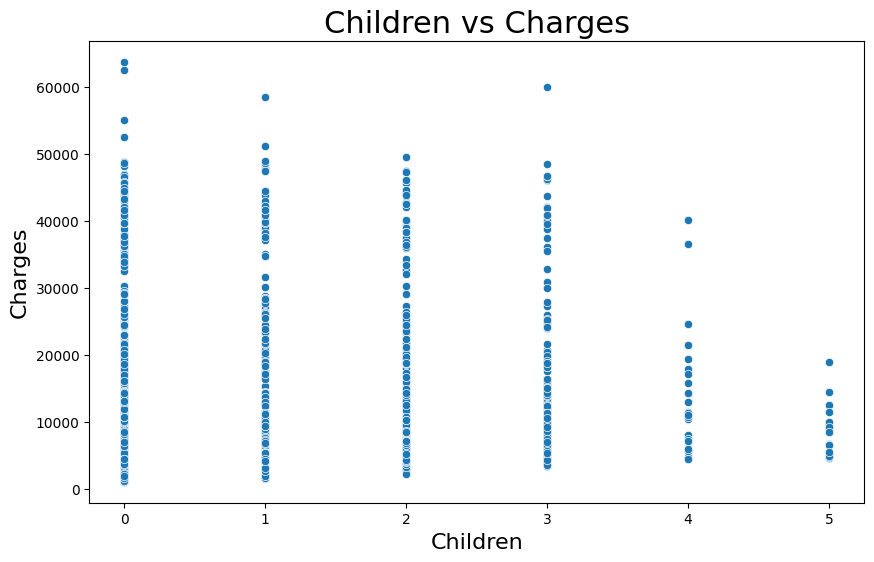

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='children', y='charges', data=insurance_dataset)
plt.xlabel('Children', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.title('Children vs Charges', fontsize=22)
plt.show()

In [132]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

#### Smoker vs Charges

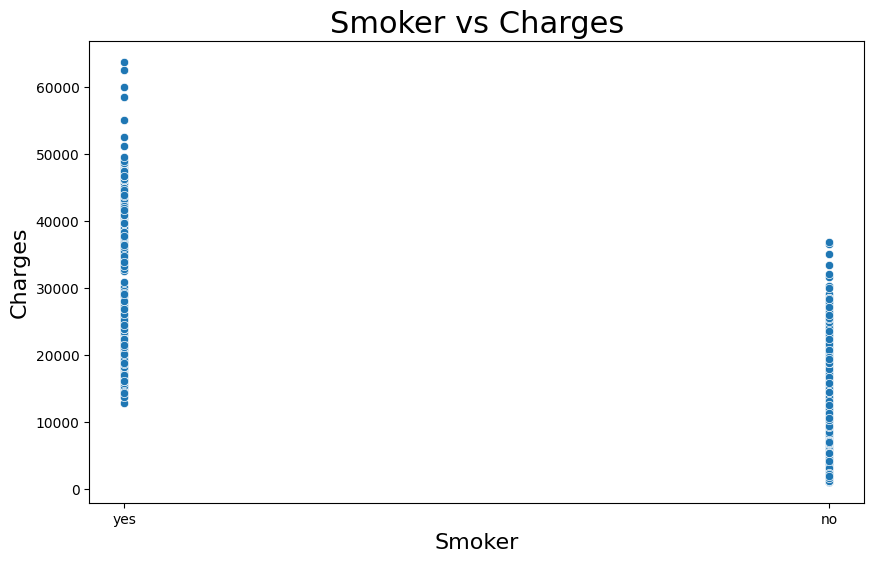

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smoker', y='charges', data=insurance_dataset)
plt.xlabel('Smoker', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.title('Smoker vs Charges', fontsize=22)
plt.show()

In [134]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

#### Region vs Charges

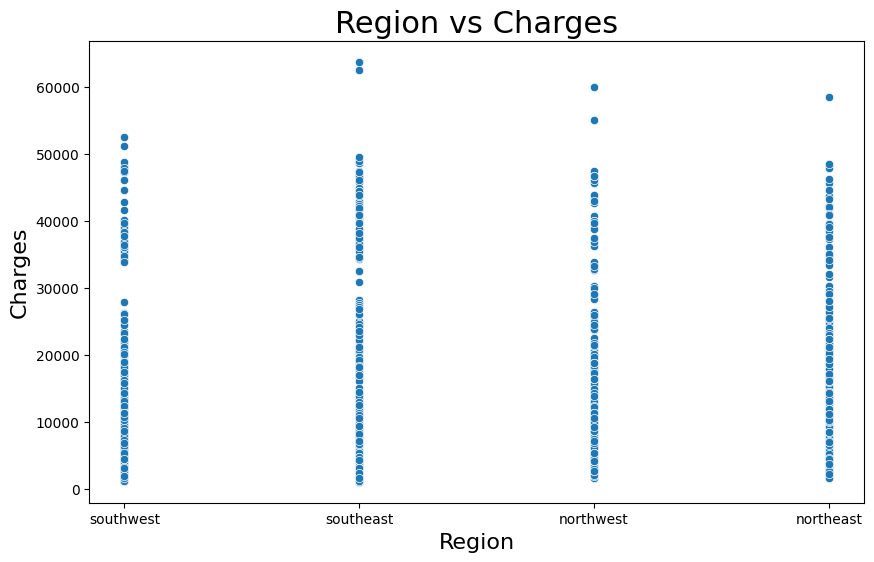

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='region', y='charges', data=insurance_dataset)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.title('Region vs Charges', fontsize=22)
plt.show()

In [136]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Encoding of Categorical Values

In [139]:
le = LabelEncoder()

In [140]:
insurance_dataset['sex'] = le.fit_transform(insurance_dataset['sex'])
insurance_dataset['smoker'] = le.fit_transform(insurance_dataset['smoker'])
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [141]:
region_cols = pd.get_dummies(insurance_dataset['region'], columns='region', dtype=int, drop_first=True)
region_cols

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [142]:
insurance_dataset = pd.merge(insurance_dataset, region_cols, left_index=True, right_index=True)
insurance_dataset = insurance_dataset.drop(columns='region')
insurance_dataset

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1
